In [1]:
import psycopg2
import pandas as pd
import config
from matplotlib import pylab as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML
import re


color_palette = sns.color_palette(palette='muted', n_colors=None, desat=.75)
sns.set(context='notebook', palette=color_palette, style='whitegrid', font='sans-serif', font_scale=1.5, color_codes=False, rc=None)
pd.set_option('display.max_colwidth', -1)
table_styles = [{'selector': 'td',
                 'props': [('min-width', '100px'), ('text-align', 'center')]},
                {'selector': 'tr',
                 'props': [('border-bottom', '1px dotted black')]},
                {'selector': 'th',
                 'props': [('text-align', 'center')]}
               ]

%matplotlib inline

directory = "url_top_lists/"
stream = "comparison"

In [2]:
conn = None
try:
    # read connection parameters
    paramsS17 = config.cfgAzureS17()
    paramsS03 = config.cfgAzureS03()

    paramsF17 = config.cfgAzureF17()
    paramsF03 = config.cfgAzureF03()
    
    # connect to the PostgreSQL server
    print('Connecting to the PostgreSQL database...')
    connS17 = psycopg2.connect(**paramsS17)
    connS03 = psycopg2.connect(**paramsS03)
    
    connF17 = psycopg2.connect(**paramsF17)
    connF03 = psycopg2.connect(**paramsF03)

    # create a cursor
    curS17 = connS17.cursor()
    curS03 = connS03.cursor()
    
    curF17 = connF17.cursor()
    curF03 = connF03.cursor()

    # execute a statement
    print('PostgreSQL database version:')
    
    curS17.execute('SELECT version()')
    curS03.execute('SELECT version()')
    curF17.execute('SELECT version()')
    curF03.execute('SELECT version()')
    
    # display the PostgreSQL database server version
    db_version_curS17 = curS17.fetchone()
    db_version_curS03 = curS03.fetchone()
    db_version_curF17 = curF17.fetchone()
    db_version_curF03 = curF03.fetchone()
    
    print(db_version_curS17)
    print(db_version_curS03)
    print(db_version_curF17)
    print(db_version_curF03)

    # close the communication with the PostgreSQL
    curS17.close()
    curS03.close()
    curF17.close()
    curF03.close()

except (Exception, psycopg2.DatabaseError) as error:
    print(error)

Connecting to the PostgreSQL database...
PostgreSQL database version:
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)
('PostgreSQL 9.6.7, compiled by Visual C++ build 1800, 64-bit',)


In [9]:
tweetsS17 = pd.read_sql_query("SELECT * FROM tweets_info;", connS17 )

print("Number of Tweets: %s" %len(tweetsS17))
tweetsS17.head()

Number of Tweets: 112003


,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
0,988175614908788736,1647758059,"Johangeorgenstadt 23:59 Nachtzeit/Trocken/Klar ,Temp: 14°C, Hum:66%, Wind:WSW 0-&gt;24kmh, Baro: 1012.80hPa, Regen: 0.00mm #wetter",Sun Apr 22 22:00:00 +0000 2018,"<a href=""http://saratoga-weather.org/scripts-TweetWX.php#TweetWX"" rel=""nofollow"">TweetWX</a>",de,False,False,NaN,False,...,0,False,False,wetter,None,0,False,None,NaN,NaN
1,988175619098861568,234778734,Beim nächsten Ton ist es 0 Uhr: ♩♩♩,Sun Apr 22 22:00:01 +0000 2018,"<a href=""http://www.rasputin.de/"" rel=""nofollow"">rasputin</a>",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
2,988175627453952002,821834588158853120,[d] DiplIngMarkus Verbrauch gestern: 3.71 kWh Uptime: 41 days 21:01:04 since 23:48:32 13/10/2017,Sun Apr 22 22:00:03 +0000 2018,"<a href=""http://arduino-tweet.appspot.com/"" rel=""nofollow"">Arduino</a>",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
3,988175627479146498,859148218915069952,Alien Mutterschiff sozusagen \n(Hab das Gefühl bin schwanger) \n(Das gibt dann rr Stress) https://t.co/z4uHz2dugO,Sun Apr 22 22:00:03 +0000 2018,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",de,False,False,NaN,False,...,0,False,False,None,None,0,False,None,NaN,NaN
4,988175681996681218,3206249890,@MDegen55 🇩🇪🇩🇪 Gute Nacht 🌃🌃🌃 https://t.co/OTnsAsDGrc,Sun Apr 22 22:00:16 +0000 2018,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,False,False,NaN,False,...,0,False,False,None,3206249890,0,False,None,NaN,NaN


In [7]:
tweetsS17[tweetsS17['is_retweet'] == True]['retweet_id'].head()

12    9.876707e+17
13    9.881611e+17
22    9.878099e+17
34    9.881663e+17
36    9.881150e+17
Name: retweet_id, dtype: float64

In [21]:
#tweetsS17['retweet_id'] = tweetsS17['retweet_id'].astype(str)
topRTid = tweetsS17['retweet_id'].value_counts()
i = 0

for index, value in topRTid.iteritems():
    #print(index)
    
    print(format(index, '.0f') + "\t" + str(value))
    i += 1
    if i == 10:
        break

989242356452020224	106
988152763811950592	62
988270038313590784	49
988402498137460736	46
989910811496927232	45
988472171285622784	39
989815302975361024	37
989891632957939712	35
988529537431625728	35
988750169750433792	35


In [34]:
tweetsS17[(tweetsS17['retweet_id'] == 988270038313590784) | (tweetsS17['id'] == 988270038313590784)]

,id,user_id,text,created_at,source,lang,truncated,is_retweet,retweet_id,is_quote,...,favorite_count,favorited,retweeted,hashtags,user_mentions,number_of_urls,extracted,coordinates_type,coordinates_long,coordinates_lat
1671,988291180537540609,481313035,RT @chrisbrown: TEEN TITANZ OHB. EXPRESSION https://t.co/mMQliDtRUs,2018-04-23 07:39:13+02:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",de,False,True,9.882700e+17,False,...,0,False,False,None,119509520,0,False,None,NaN,NaN
1693,988270162875965441,3614781081,RT @chrisbrown: TEEN TITANZ OHB. EXPRESSION https://t.co/mMQliDtRUs,2018-04-23 06:15:42+02:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,False,True,9.882700e+17,False,...,0,False,False,None,119509520,0,False,None,NaN,NaN
1716,988270141900247040,846335414550085632,RT @chrisbrown: TEEN TITANZ OHB. EXPRESSION https://t.co/mMQliDtRUs,2018-04-23 06:15:37+02:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",de,False,True,9.882700e+17,False,...,0,False,False,None,119509520,0,False,None,NaN,NaN
1718,988270038313590784,119509520,TEEN TITANZ OHB. EXPRESSION https://t.co/mMQliDtRUs,2018-04-23 06:15:12+02:00,"<a href=""http://www.hootsuite.com"" rel=""nofollow"">Hootsuite</a>",de,False,False,NaN,False,...,27392,False,False,None,None,0,True,None,NaN,NaN
1719,988270183881019393,465201171,RT @chrisbrown: TEEN TITANZ OHB. EXPRESSION https://t.co/mMQliDtRUs,2018-04-23 06:15:47+02:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",de,False,True,9.882700e+17,False,...,0,False,False,None,119509520,0,False,None,NaN,NaN
1723,988270326483210241,1069657824,RT @chrisbrown: TEEN TITANZ OHB. EXPRESSION https://t.co/mMQliDtRUs,2018-04-23 06:16:21+02:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",de,False,True,9.882700e+17,False,...,0,False,False,None,119509520,0,False,None,NaN,NaN
1735,988270506821337088,3193413170,RT @chrisbrown: TEEN TITANZ OHB. EXPRESSION https://t.co/mMQliDtRUs,2018-04-23 06:17:04+02:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,False,True,9.882700e+17,False,...,0,False,False,None,119509520,0,False,None,NaN,NaN
1751,988270804608667648,767777578736386048,RT @chrisbrown: TEEN TITANZ OHB. EXPRESSION https://t.co/mMQliDtRUs,2018-04-23 06:18:15+02:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",de,False,True,9.882700e+17,False,...,0,False,False,None,119509520,0,False,None,NaN,NaN
1768,988271568001388545,554662722,RT @chrisbrown: TEEN TITANZ OHB. EXPRESSION https://t.co/mMQliDtRUs,2018-04-23 06:21:17+02:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",de,False,True,9.882700e+17,False,...,0,False,False,None,119509520,0,False,None,NaN,NaN
1793,988272528480264192,184631048,RT @chrisbrown: TEEN TITANZ OHB. EXPRESSION https://t.co/mMQliDtRUs,2018-04-23 06:25:06+02:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",de,False,True,9.882700e+17,False,...,0,False,False,None,119509520,0,False,None,NaN,NaN


In [25]:
tweetsS17['created_at'] = tweetsS17['created_at'].astype('datetime64[ns]')
tweetsS17['created_at'] = tweetsS17['created_at'].dt.tz_localize("UTC").dt.tz_convert("Europe/Berlin")

Text(0,0.5,'users created')

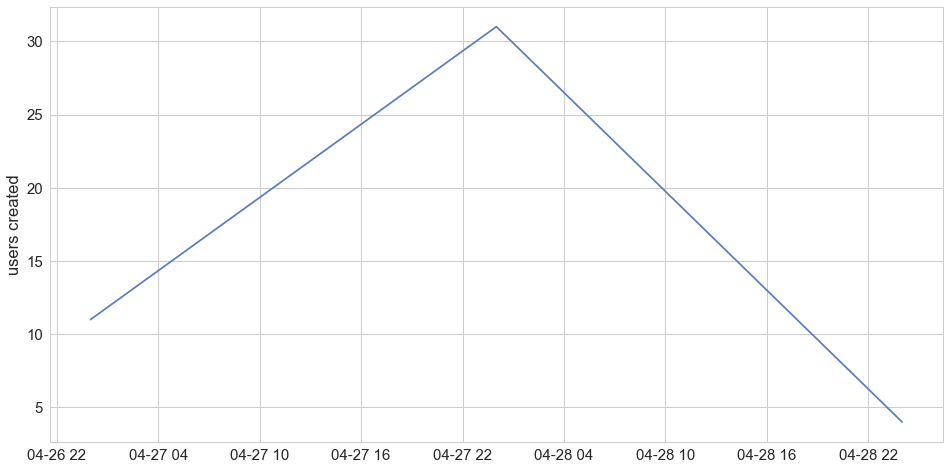

In [38]:
selected_tweets = tweetsS17[(tweetsS17['retweet_id'] == 989910811496927232) | (tweetsS17['id'] == 989910811496927232)]
plt.figure(figsize=(16,8))
retweet_path = selected_tweets['created_at'].value_counts().resample('D').sum()
#retweet_path = selected_tweets['created_at'].value_counts().resample('Min').sum().loc['2018-04-23 00:00:00':'2018-04-26 00:00:00']
plt.plot(retweet_path.index, retweet_path)
plt.ylabel('users created')

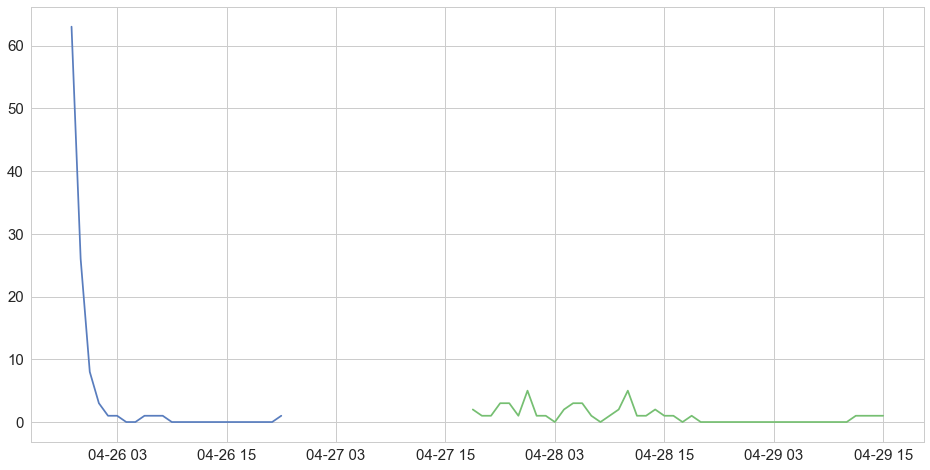

In [74]:
def plotThis(tweets, tweet_id, interval):
    rt_path = tweets[(tweets['retweet_id'] == tweet_id) | (tweets['id'] == tweet_id)]['created_at'].value_counts()
    plt.plot(rt_path.resample(interval).sum().index, rt_path.resample(interval).sum().values, label=format(index, '.0f'))

plt.figure(figsize=(16,8))
plotThis(tweetsS17, 989242356452020224, 'h')
plotThis(tweetsS17, 989910811496927232, 'h')

989242356452020224	106
988152763811950592	62
988270038313590784	49
988402498137460736	46
989910811496927232	45
988472171285622784	39
989815302975361024	37
989891632957939712	35
988529537431625728	35
988750169750433792	35


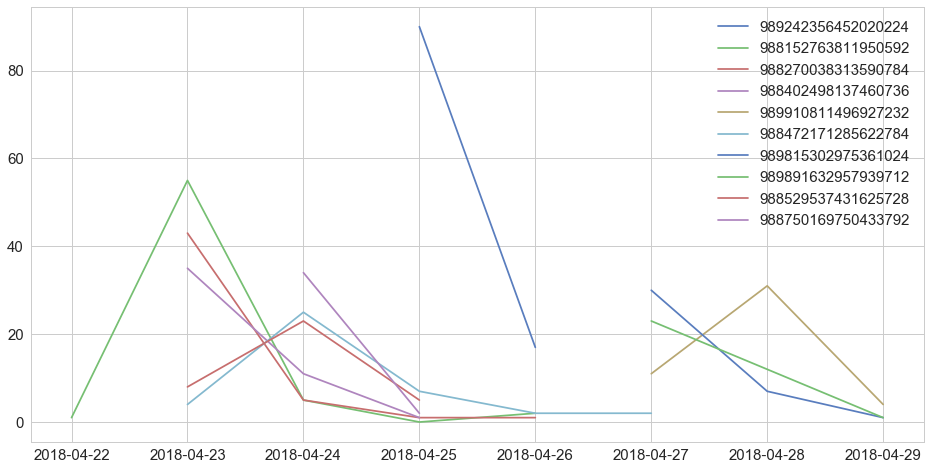

In [76]:
topRTid = tweetsS17['retweet_id'].value_counts()
i = 0

plt.figure(figsize=(16,8))

for index, value in topRTid.iteritems():
    #print(index)
    
    print(format(index, '.0f') + "\t" + str(value))
    #plotThis(tweetsS17, format(index, '.0f'), 'h')
    plotThis(tweetsS17, index, 'D')
    i += 1
    if i == 10:
        break

plt.legend()

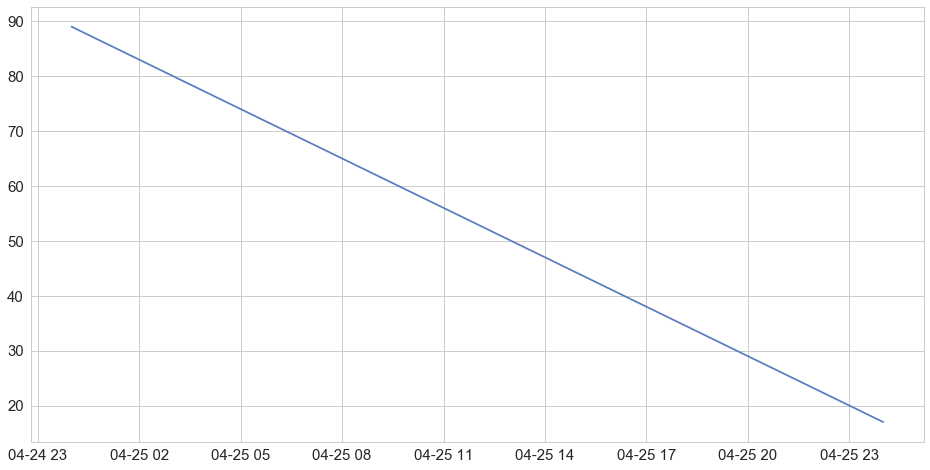

In [53]:
plt.figure(figsize=(16,8))
rt_path_01 = tweetsS17[(tweetsS17['retweet_id'] == 989242356452020224) | (tweetsS17['id'] == 989242356452020224)]['created_at'].value_counts()
plt.plot(rt_path_01.resample('D').sum().index, rt_path_01.resample('D').sum().values)

Text(0,0.5,'users created')

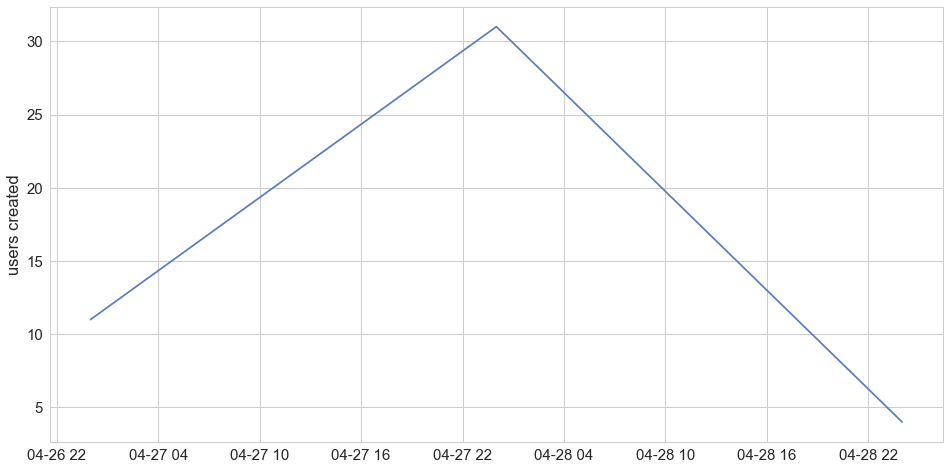

In [52]:
selected_tweets = tweetsS17[(tweetsS17['retweet_id'] == 989910811496927232) | (tweetsS17['id'] == 989910811496927232)]
plt.figure(figsize=(16,8))
retweet_path = selected_tweets['created_at'].value_counts().resample('D').sum()
#retweet_path = selected_tweets['created_at'].value_counts().resample('Min').sum().loc['2018-04-23 00:00:00':'2018-04-26 00:00:00']
plt.plot(retweet_path.index, retweet_path)
plt.ylabel('users created')

In [77]:
tweetsF17 = pd.read_sql_query("SELECT id, is_retweet, retweet_id, created_at FROM tweets_info;", connF17 )

print("Number of Tweets: %s" %len(tweetsF17))
tweetsF17.head()

Number of Tweets: 7269347


,id,is_retweet,retweet_id,created_at
0,988416340770902016,False,NaN,Mon Apr 23 13:56:34 +0000 2018
1,988175612497063936,False,NaN,Sun Apr 22 22:00:00 +0000 2018
2,988175612710998016,False,NaN,Sun Apr 22 22:00:00 +0000 2018
3,988175612778024960,False,NaN,Sun Apr 22 22:00:00 +0000 2018
4,988175612941611010,False,NaN,Sun Apr 22 22:00:00 +0000 2018


In [ ]:
tweetsF17['created_at'] = tweetsF17['created_at'].astype('datetime64[ns]')
tweetsF17['created_at'] = tweetsF17['created_at'].dt.tz_localize("UTC").dt.tz_convert("Europe/Berlin")

In [ ]:
topRTid = tweetsF17['retweet_id'].value_counts()
i = 0

plt.figure(figsize=(16,8))

for index, value in topRTid.iteritems():
    #print(index)
    
    print(format(index, '.0f') + "\t" + str(value))
    #plotThis(tweetsS17, format(index, '.0f'), 'h')
    plotThis(tweetsF17, index, 'D')
    i += 1
    if i == 10:
        break

plt.legend()